In [13]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import rasterio
import os
from functions import *
from pathlib import Path
from scipy import stats
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
#Satellite datas directory
data_dir = Path('../Data')

In [3]:
for file in os.listdir(data_dir):
    if file.endswith('.tif'):
        print(f'Processing {file}...')
        read_raster(data_dir / file, data_dir)
        

Processing landsat_9.tif...
Calculation of NDVI, EVI, NDWI in progress... of the raster file: {basename} 
Raster file saved at: ../Data/NDVI/landsat_9NDVI.tif
Raster file saved at: ../Data/EVI/landsat_9EVI.tif
Raster file saved at: ../Data/NDWI/landsat_9NDWI.tif
Raster file saved at: ../Data/SAVI/landsat_9SAVI.tif
Processing landsat_8.tif...
Calculation of NDVI, EVI, NDWI in progress... of the raster file: {basename} 
Raster file saved at: ../Data/NDVI/landsat_8NDVI.tif
Raster file saved at: ../Data/EVI/landsat_8EVI.tif
Raster file saved at: ../Data/NDWI/landsat_8NDWI.tif
Raster file saved at: ../Data/SAVI/landsat_8SAVI.tif


<span style="font-family: 'Times New Roman', Times, serif; font-size: 1.5em;">Plotting the Indexes</span>


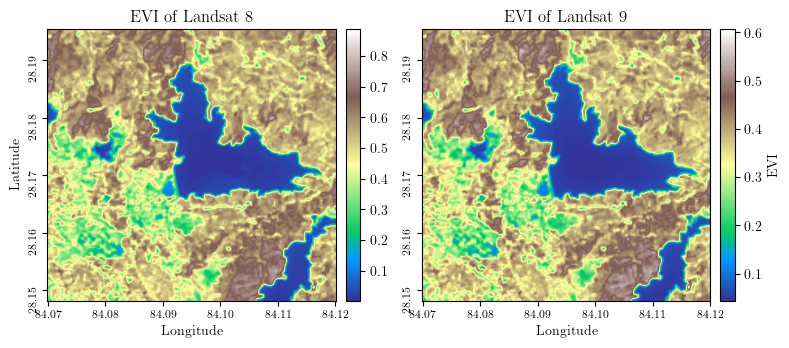

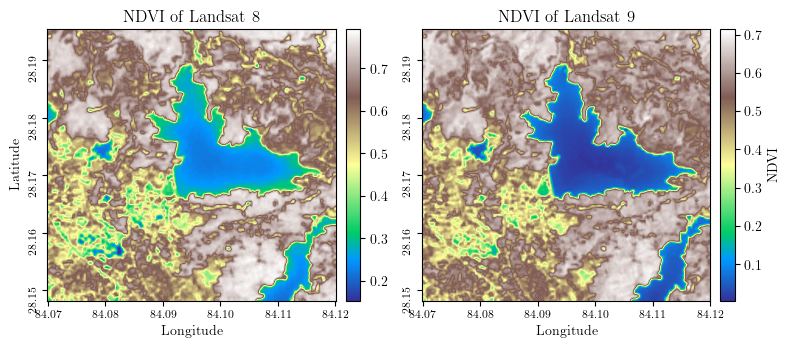

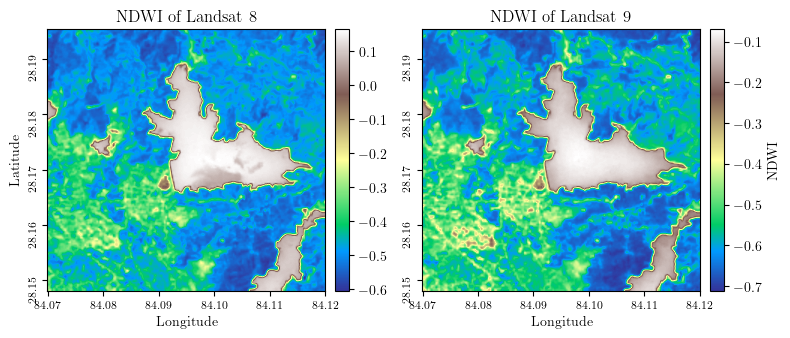

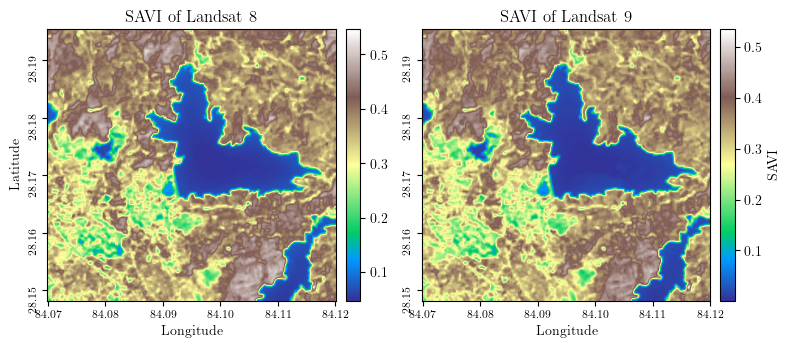

In [4]:
#Calling the function to plot the rasters
plot_rasters_with_custom_titles('/Users/supath/Downloads/GeoWorldCode/Data/EVI', ["EVI of Landsat 8", "EVI of Landsat 9"], "EVI", '../Images/EVI.png')
plot_rasters_with_custom_titles('/Users/supath/Downloads/GeoWorldCode/Data/NDVI', ["NDVI of Landsat 8", "NDVI of Landsat 9"], "NDVI", '../Images/NDVI.png')
plot_rasters_with_custom_titles('/Users/supath/Downloads/GeoWorldCode/Data/NDWI', ["NDWI of Landsat 8", "NDWI of Landsat 9"], "NDWI", '../Images/NDWI.png')
plot_rasters_with_custom_titles('/Users/supath/Downloads/GeoWorldCode/Data/SAVI', ["SAVI of Landsat 8", "SAVI of Landsat 9"], "SAVI",  '../Images/SAVI.png')


<span style="font-family: 'Times New Roman', Times, serif; font-size: 1.5em;">Plotting the BOX PLOT</span>


In [5]:
#Getting the sampled data
NDVI_dir = Path('../Data/NDVI')
process_raster_directory(NDVI_dir)

#FOR NDWI
NDWI_dir = Path('../Data/NDWI')
process_raster_directory(NDWI_dir)

#FOR EVI
EVI_dir = Path('../Data/EVI')
process_raster_directory(EVI_dir)

#FOR SAVI
SAVI_dir = Path('../Data/SAVI')
process_raster_directory(SAVI_dir)

Sampled values saved to ../Data/NDVI/Sampled.csv
Sampled values saved to ../Data/NDWI/Sampled.csv
Sampled values saved to ../Data/EVI/Sampled.csv
Sampled values saved to ../Data/SAVI/Sampled.csv


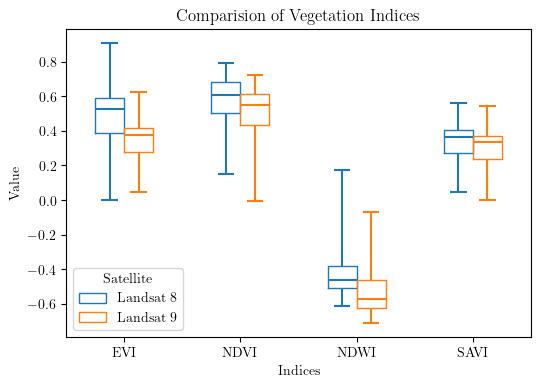

In [8]:
# Load the combined file into a DataFrame
file_path = Path("../Data/VegetationIndicesCombined.csv")
data_frame = pd.read_csv(file_path)

# Plotting box plot for each column
plt.figure(figsize=(6, 4))
sns.boxplot(x = 'Indices', y='Value', data=data_frame, hue='Satellite', fill = False, whis=(0,100), width=0.5, boxprops={'linewidth': 1})

plt.title('Comparision of Vegetation Indices', fontsize=12, fontweight='bold')
plt.xlabel('Indices', fontsize=10, fontweight='bold')
plt.ylabel('Value', fontsize=10, fontweight='bold')
plt.legend(title='Satellite', loc='lower left', fontsize=10)

plt.savefig('../Images/boxplot.png', dpi = 500, bbox_inches = 'tight')
plt.show()



<span style="font-family: 'Times New Roman', Times, serif; font-size: 1.5em;">Correlation</span>


In [ ]:
def read_raster(raster):
    with rasterio.open(raster) as src:
        raster = src.read(1)
        flatten = raster.flatten()
        mask = ~np.isnan(flatten)
        flatten_mask  = flatten[mask]
        return flatten_mask
#NDVI
landsat_8 = read_raster('../Data/SAVI/landsat_8SAVI.tif')
landsat_9 = read_raster('../Data/SAVI/landsat_9SAVI.tif')


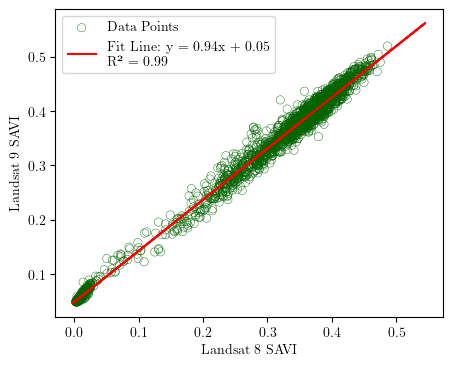

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming landsat_8 and landsat_9 are numpy arrays
raster_data1 = np.array(landsat_8)
raster_data2 = np.array(landsat_9)

# Reshape data for sklearn LinearRegression
raster_data1 = raster_data1.reshape(-1, 1)

# Perform linear regression on the full dataset
model = LinearRegression()
model.fit(raster_data1, raster_data2)
slope = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(raster_data2, model.predict(raster_data1))

# Generate fit line
fit_line = model.predict(raster_data1)

# Select a subset of points for plotting
subset_indices = np.random.choice(raster_data1.shape[0], size=2000, replace=False)
subset_raster_data1 = raster_data1[subset_indices]
subset_raster_data2 = raster_data2[subset_indices]

# Plot subset of data points and fit line
plt.figure(figsize=(5, 4))
plt.scatter(subset_raster_data1, subset_raster_data2, edgecolor='darkgreen', linewidths=0.3, facecolor='none', label='Data Points')
plt.plot(raster_data1, fit_line, color='red', label=f'Fit Line: y = {slope:.2f}x + {intercept:.2f}\nR² = {r2:.2f}')
plt.xlabel('Landsat 8 SAVI', fontsize=10)
plt.ylabel('Landsat 9 SAVI', fontsize=10)
plt.legend()

#Save the plot
plt.savefig('../Images/linearregSAVI.png', dpi = 500, bbox_inches = 'tight')
plt.grid(False)
plt.show()


## LULC Plot and Classes Distribution

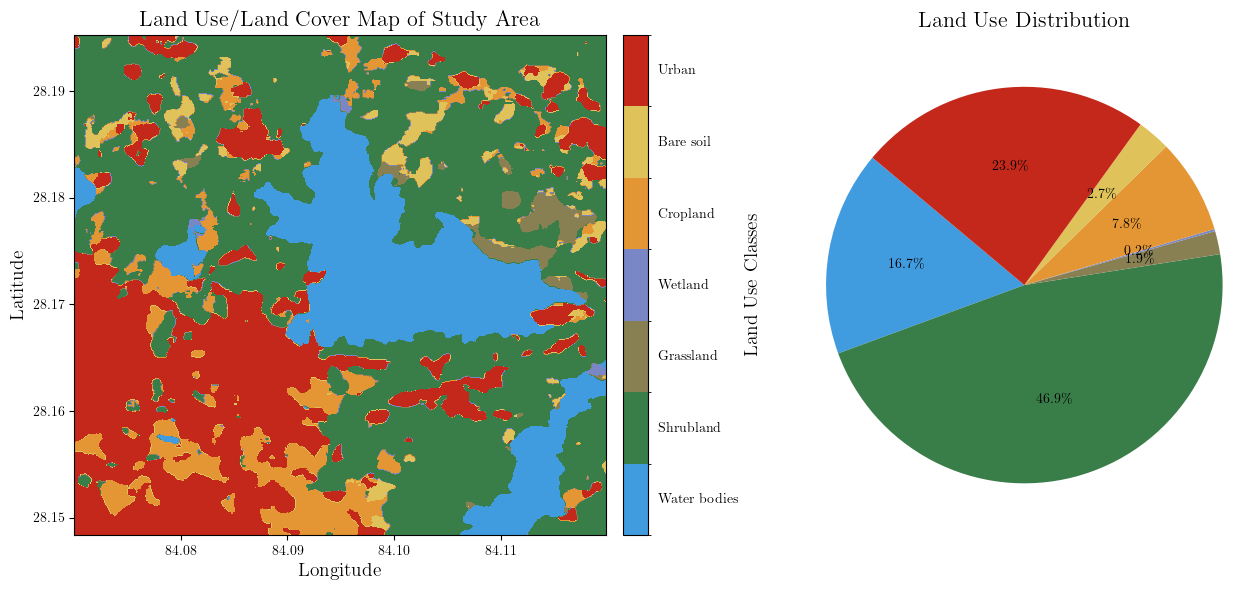

In [54]:
# Load the LULC data
lulc_path = Path('../Data/LULC.tif')
with rasterio.open(lulc_path) as src:
    lulc_data = src.read(1)
    transform = src.transform 
    bounds = src.bounds        

# Define the category names and corresponding colors
category_names = [
    'Water bodies', 'Shrubland', 'Grassland', 'Wetland', 'Cropland', 'Bare soil',
    'Urban'
]
colors = [
    '#419BDF', '#397D49', '#888053', '#7A87C6', '#E49635', '#DFC35A',
    '#C4281B'
]

# Create a color map
cmap = ListedColormap(colors)

# Define the boundaries for each class
boundaries = np.arange(len(category_names) + 1) - 0.5
norm = BoundaryNorm(boundaries, cmap.N, clip=True)

# Calculate the percentage of each land use class
unique, counts = np.unique(lulc_data, return_counts=True)
total_pixels = lulc_data.size
percentages = (counts / total_pixels) * 100

# Prepare a dictionary to hold percentages for each category
percent_dict = {i: 0 for i in range(len(category_names))}

# Update the dictionary with actual percentages
for u, p in zip(unique, percentages):
    if u < len(category_names):
        percent_dict[u] = p

# Create a list of percentages in the correct order
percentages = [percent_dict[i] for i in range(len(category_names))]

# Append percentages to the category names
category_labels_with_percentages = [
    f"{name}" for name in category_names
]

# Plot the LULC data and pie chart
fig, (ax, ax_pie) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [3, 1.5]})

# Use the extent parameter to set the coordinate system
extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]

im = ax.imshow(lulc_data, cmap=cmap, norm=norm, extent=extent)

# Adjust the position of the color bar to be closer to the raster
cbar = fig.colorbar(im, ax=ax, ticks=np.arange(len(category_names)), spacing='proportional', shrink=1.0, pad=0.02)
cbar.set_label('Land Use Classes', fontsize=14)
cbar.set_ticks(np.arange(len(category_names)))
cbar.set_ticklabels(category_labels_with_percentages)
cbar.ax.tick_params(labelsize=10)  # Adjust color bar tick label size

# Remove color bar percentages
cbar.ax.yaxis.set_tick_params(width=0)  # Hide the y-axis ticks and labels

# Plot the pie chart
ax_pie.pie(percentages, colors=colors, autopct='%1.1f%%', startangle=140)
ax_pie.axis('equal') 
ax_pie.set_title('Land Use Distribution', fontsize=16)

# Set the title and labels for the raster
ax.set_title('Land Use/Land Cover Map of Study Area', fontsize=16)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Show the plot
plt.tight_layout()

#Save the Image
plt.savefig('../Images/LULC.png', dpi = 500, bbox_inches = 'tight')
plt.show()
